# Problem 2, Parts A-B: Boosted Decision Tree

In this Jupyter notebook, we will train a boosted decision tree on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts A-B by filling in the sections marked `# TODO` and running all cells.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [2]:
from xgboost import XGBClassifier

#==============================================
# TODO: Implement the BDT model instance
#==============================================    
bdt = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, objective='binary:logistic',
colsample_bytree=0.8, subsample=0.8)

#==============================================
# TODO: Fit the training data
#==============================================    
bdt.fit(X_train, y_train)

# retrieve predictions and take index [:, 1] corresponding to signal
preds_bdt = bdt.predict_proba(X_test)[:, 1]

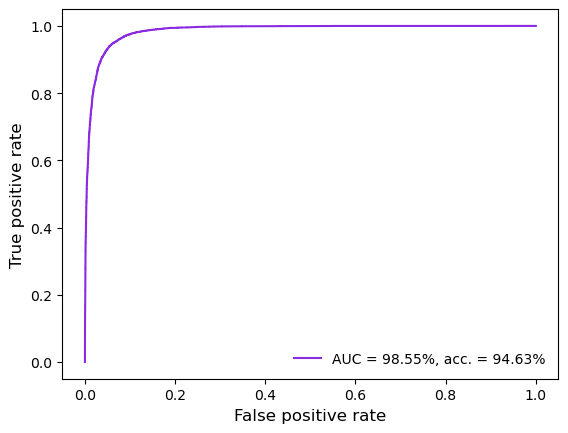

In [4]:
from roc_helper import plot_roc
fig = plot_roc(y_test, preds_bdt)
fig.savefig("roc_bdt.pdf")

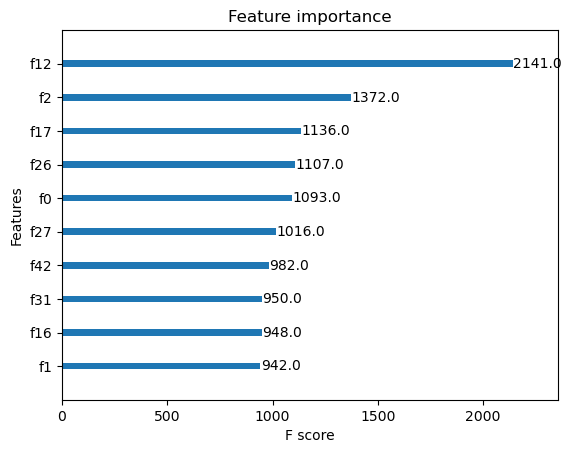

In [8]:
import xgboost as xgb

#==============================================
# TODO: Plot the importance using
# xgb.plot_importance
#============================================== 

ax = xgb.plot_importance(bdt, grid=False, max_num_features=10)
ax.get_figure().savefig("importance.pdf")

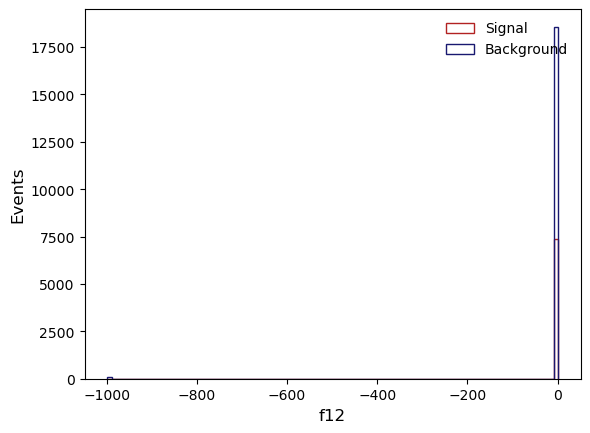

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#==============================================
# TODO: Plot the most important feature 
# separately for signal and background
# using the specified binning
#============================================== 

bins = np.linspace(np.min(X_test[:,12]), np.max(X_test[:,12]), 100)

plt.figure()
plt.hist(
    X_test[:,12][y_test == 1],
    histtype="step",
    color="firebrick",
    label="Signal",
    bins=bins
)
plt.hist(
    X_test[:,12][y_test == 0],
    histtype="step",
    color="midnightblue",
    label="Background",
    bins=bins
)

plt.xlabel("f12", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.legend(frameon=False)
plt.savefig("feature_12.pdf")
plt.show()

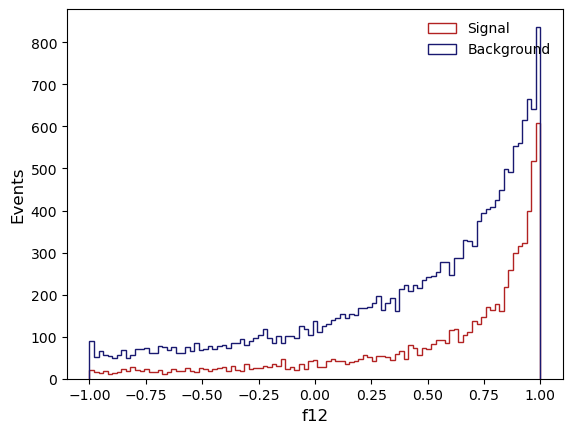

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#==============================================
# TODO: Plot the most important feature 
# separately for signal and background
# using the specified binning
#============================================== 

mask = X_test[:,12] > -999

bins = np.linspace(np.min(X_test[mask][:,12]), np.max(X_test[mask][:,12]), 100)

plt.figure()
plt.hist(
    X_test[:,12][(y_test == 1) & mask],
    histtype="step",
    color="firebrick",
    label="Signal",
    bins=bins
)
plt.hist(
    X_test[:,12][(y_test == 0) & mask],
    histtype="step",
    color="midnightblue",
    label="Background",
    bins=bins
)

plt.xlabel("f12", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.legend(frameon=False)
plt.savefig("feature_12_no_outlier.pdf")
plt.show()